# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/soumyakrishnamurthy/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


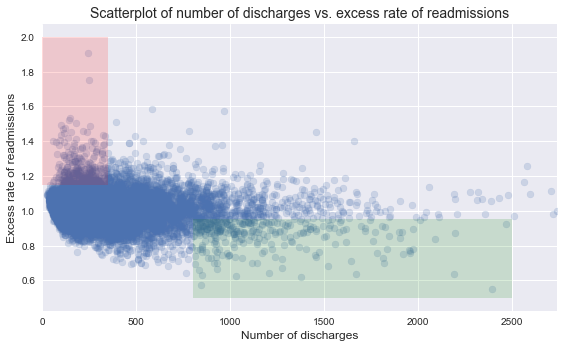

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# My turn: Start of analysis
Overall, these are initial observations based on a scatter chart and I would like to do futher investigation before reaching any conclusions. There is not enough statistical analysis which is the weakest part of this study. 

Some aspects to ponder over are:
1. There might be many other factors that explain the observed trends. 
2. They do not do any inferential statistics; they simply calculate the means and what fraction of the sample data has a readmission rate greater than 1. 
3. The mean considered is for number of discharges < 100 and one for > 1000. However, their conclusions are about hospitals with < 300 discharges.

There are two hypothesis to prove to reach the conclusions from the preliminay analysis.
The first one is the existence of an inverse relationship between number of discharges and Excess Readmission Ratio
Second is a significant correlation between hospital capacity (number of discharges) and readmission rates

They will be analysed in more detail below



# A. Initial observations based on the plot above
* Overall, rate of readmissions is trending down with increasing number of discharges
* With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
* With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

Lets look into this claim in more detail. We can plot graphs to see if there is an inverse relationship.

In [5]:
# rename dataset so it is easier to analyse
new_df = clean_hospital_read_df
len(new_df)

11578

In [6]:
# create a dataset without nan or null values
data = new_df[new_df['Number of Discharges'] != 0]
len(data)

11497

In [7]:
# descrptive analysis of dataset
data.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


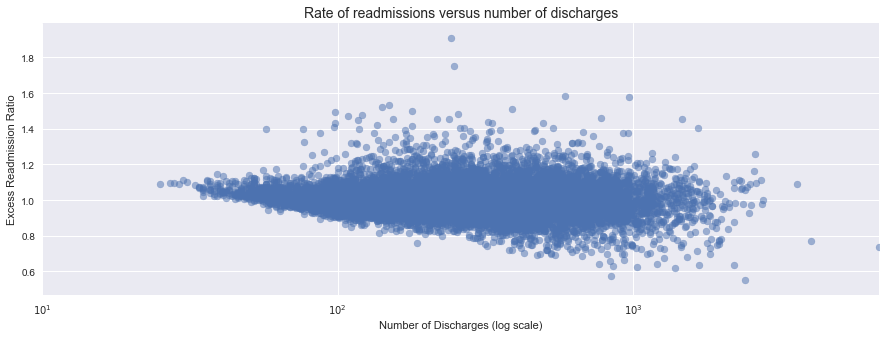

In [8]:
# create a dataset x with data related to number of discharges and y with excess readmission ratio
x = data['Number of Discharges']
y = data['Excess Readmission Ratio']

# check hypothesis by plotting a scattergram
fig, sc = plt.subplots(figsize=(15,5))
sc.scatter(x, y, alpha=0.5)
sc.set_xscale('symlog')
sc.set_xlim([10, max(x)])
plt.title('Rate of readmissions versus number of discharges', fontsize=14)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Number of Discharges (log scale)')
plt.show()

/Users/soumyakrishnamurthy/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


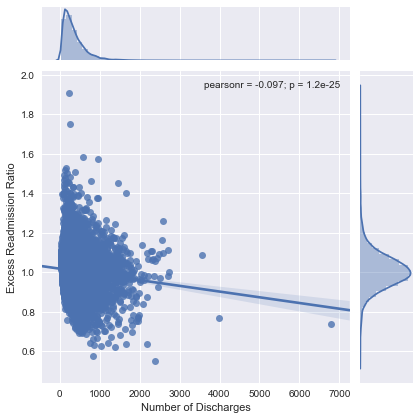

In [9]:
# use seaborn to plot the Number of Discharges against Excess Readmission Ratio
sns.jointplot(x, y, kind='reg')

The above scattergram does not show a strong inverse relationship between number of discharges and Excess Readmission Ratio. However, using seaborn, we can clearly see a weak but linear negative relationship.

# B. Verify Statistics
* In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
* In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [10]:
# filter datasets
hosp_100 = data[data['Number of Discharges'] < 100]
hosp_1000 = data[data['Number of Discharges'] > 1000]

# proportion of hospitals/facilities with certain number sized of discharges
n = len(new_df['Number of Discharges'])

print('discharges < 100 are %f or %3.2f' %(len(hosp_100), len(hosp_100)/n*100), '%')
print('discharges > 1000 are %f or %3.2f' %(len(hosp_1000), len(hosp_1000)/n*100), '%')
print('-------')

#  verify mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
mean = hosp_100['Excess Readmission Ratio'].mean()
perc = float(len(new_df[(new_df['Number of Discharges'] <100) & (new_df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) / len(hosp_100)

print("Findings for Discharges <100")
print("%5s %11.3f" % ('mean', mean)) 
print("%5s %11.2f%%" % ('perc', perc*100)) 

# verify mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
mean = hosp_1000['Excess Readmission Ratio'].mean()
perc = float(len(new_df[(new_df['Number of Discharges'] >1000) & (new_df['Excess Readmission Ratio'] > 1)]['Excess Readmission Ratio'])) / len(hosp_1000)

print("Findings for Discharges >1000")
print("%5s %11.3f" % ('mean', mean)) 
print("%5s %11.2f%%" % ('perc', perc*100)) 


discharges < 100 are 1188.000000 or 10.26 %
discharges > 1000 are 463.000000 or 4.00 %
-------
Findings for Discharges <100
 mean       1.023
 perc       63.22%
Findings for Discharges >1000
 mean       0.978
 perc       44.49%


The calculated figures from the statistical anaysis matches with the numbers already given in the findings

# C. Verify Conclusions
There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

In [11]:
data[['Number of Discharges', 'Excess Readmission Ratio']].corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


A correlation of -0.1 points to a very weak downward (negative) linear relationship between discharges and admission ratio. A correlation of 1 or -1 would point to a perfect liniear relationsip, while zero would point to no linear relationship. So the claim that "There is a significant correlation between hospital capacity (number of discharges) and readmission rates" does not hold.

# D Investigate recommendations

Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. This assumes that there is a difference between readmission rates for hospitals based on capacity.

Since we do not know the population standard deviation, it is better to use the t-test rather than the z-test

We can also use the Mann-Whitney-Wilcoxon (MWW) RankSum test to test if the two distributions are significantly differnt or not. 

The conditions are:

1. Randomization Condition: The data must be sampled randomly.From the information given to us already, we can assume that the data from the sample is chosen randomly.

2. Independence Assumption: The sample values must be independent of each other. This means that the occurrence of one event has no influence on the next event. Usually, if we know that people or items were selected randomly we can assume that the independence assumption is met. We also know the samples are selected from different hospitals and are hence independent

3. 10% Condition: When the sample is drawn without replacement (usually the case), the sample size, n, should be no more than 10% of the population. Since the total population is in millions, we can assume safely that the sample size is less than 10% of the population.

4. Sample Size Assumption: The sample size must be sufficiently large. In this case, the sample size is much more than 30 considered sufficient. 

 The null and alternate hypotheses 

- H*0*: There are differences in the mean excess readmission rates between hospitals 
- H*A*: There are NO differences in the mean excess readmission rates between hospitals 

In [12]:
# first separate data based on number of discharges

less_300 =  data[data['Number of Discharges'] < 300]
greater_300 =  data[data['Number of Discharges'] >= 300]

less_300.std()
greater_300.std()

l300 = sorted(less_300['Excess Readmission Ratio'])
g300 = sorted(greater_300['Excess Readmission Ratio'])


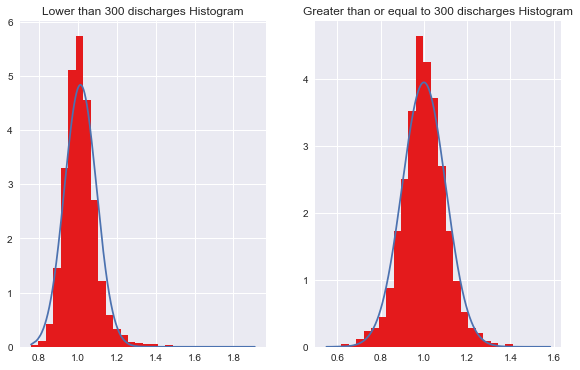

In [13]:
# plot the two distributions to get initial view if the two distributions are different

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,3,1)
mu_low = np.average(l300)
sigma_low = np.std(l300)
fit = stats.norm.pdf(l300, mu_low, sigma_low)
ax1.plot(l300, fit)
ax1.hist(l300, 30, normed=True,color='#e41a1c')
ax1.set_title("Lower than 300 discharges Histogram")

ax2 = fig.add_subplot(1,3,2)
mu_mid = np.average(g300)
sigma_mid = np.std(g300)
fit = stats.norm.pdf(g300, mu_mid, sigma_mid)
ax2.plot(g300, fit)
ax2.hist(g300, 30, normed=True,color='#e41a1c')
ax2.set_title("Greater than or equal to 300 discharges Histogram")


The data looks more or less normally distributed in both cases. However, it is evident that there is a difference between the distributions. We analyse further below

In [14]:
# compare two distributions with student's t-test
# alpha = 0.01 

t_stat, pval = stats.ttest_ind(g300, l300, equal_var=False)
print('The p value is',pval)
if pval < 0.01:
    print('There are differences in the mean excess readmission rates between hospitals')
else:
    print('There are NO differences in the mean excess readmission rates between hospitals')

The p value is 1.38620995931e-16
There are differences in the mean excess readmission rates between hospitals


In [15]:
# compare two distributions with MWW RankSum test
# alpha = 0.01 

z_stat, pval = stats.ranksums(g300, l300)
print('The p value is',pval)
if pval < 0.01:
    print('There are differences in the mean excess readmission rates between hospitals')
else:
    print('There are NO differences in the mean excess readmission rates between hospitals')

The p value is 3.78841819322e-11
There are differences in the mean excess readmission rates between hospitals


The p-value from the tests is extremely small. This implies that we can reject the null hypothesis. There are differences in the mean excess readmission rates between hospitals which cannot be attributed to randomness. Therefore, we should probably look into other variables or columns that might influence excess readmissions.
Even though there is a differnce in discharges based on capacity, it might be due to other factors like larger hospitals receiving more complicated cases, covering more area etc. So I do not think we have enough data and analysis to recommend that *directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.*